# Exercise on collinearity

Last modified by Soshant Bali on 12/1/2016

In [12]:
import pandas as pd
import numpy as np
import sklearn as sk
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [13]:
#Generate data
x1=np.random.uniform(0,1,100)
x2=0.5*x1+np.random.normal(0,1,100)/10
y=2+2*x1+0.3*x2+np.random.normal(0,1,100)
#convert numpy arrays to pandas data frame
XY_df = pd.DataFrame({'y':y,'x1':x1,'x2':x2})

(a) $y=2+2x_1+0.3x_2+e$

In [14]:
#Correlation matrix
XY_df.corr()

,x1,x2,y
x1,1.000000,0.823754,0.517425
x2,0.823754,1.000000,0.460708
y,0.517425,0.460708,1.000000


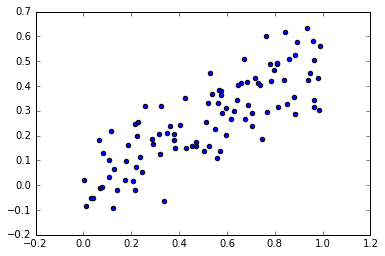

In [15]:
#Scatter plot
%matplotlib inline
plt.scatter(x1,x2)

(b) correlation between $x_1$ and $x_2$ is 0.83

In [16]:
#Linear regression
ols_model = sm.formula.ols(formula='y~x1+x2',data=XY_df)
ols_result = ols_model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     18.07
Date:                Thu, 01 Dec 2016   Prob (F-statistic):           2.14e-07
Time:                        11:59:29   Log-Likelihood:                -143.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      97   BIC:                             301.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.9528      0.214      9.113      0.0

(c) $\hat{\beta_0}=1.95$, $\hat{\beta_1}=1.78$, and $\hat{\beta_2}=0.73$, however, p-value of $\hat{\beta_2}$ is very high

In [17]:
#Calculate RSE
np.sqrt(ols_result.mse_resid)

1.0345112294079306

In [18]:
#Linear regression using only x1
ols_model = sm.formula.ols(formula='y~x1',data=XY_df)
ols_result = ols_model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     35.83
Date:                Thu, 01 Dec 2016   Prob (F-statistic):           3.54e-08
Time:                        16:13:32   Log-Likelihood:                -144.02
No. Observations:                 100   AIC:                             292.0
Df Residuals:                      98   BIC:                             297.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.9562      0.214      9.154      0.0

(d) Yes, we can reject the null hypothesis $H_0: \beta_1 = 0$, because the p-value is low

In [19]:
#Linear regression using only x2
ols_model = sm.formula.ols(formula='y~x2',data=XY_df)
ols_result = ols_model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     26.41
Date:                Thu, 01 Dec 2016   Prob (F-statistic):           1.41e-06
Time:                        16:15:06   Log-Likelihood:                -147.67
No. Observations:                 100   AIC:                             299.3
Df Residuals:                      98   BIC:                             304.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2404      0.195     11.507      0.0

(e) Yes, we can reject the null hypothesis $H_0: \beta_2 = 0$, because the p-value is low